<a href="https://colab.research.google.com/github/HussamCheema/DermCNN/blob/master/DermCNNPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import applications

In [3]:
!git clone https://github.com/HussamCheema/DermCNN.git

Cloning into 'DermCNN'...
remote: Enumerating objects: 11354, done.
remote: Counting objects: 100% (11354/11354), done.
remote: Compressing objects: 100% (11354/11354), done.
remote: Total 11354 (delta 9), reused 11335 (delta 0), pack-reused 0
Receiving objects: 100% (11354/11354), 438.29 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (11361/11361), done.


# Data Pre-Processing

In [0]:
data = []
labels = []

In [0]:
batch_size = 32
epochs = 3

In [0]:
for folder in range(1,8):
  for image in os.listdir(os.getcwd()+'/DermCNN/'+str(folder)+'/'):
    try:
      x = cv2.imread(os.getcwd()+'/DermCNN/'+str(folder)+'/'+image)
      x = cv2.resize(x, (150,150))
      data.append(x)
      labels.append(folder-1)
    except: pass


In [7]:
data = np.array(data)
labels = np.array(labels)
print(len(data))
print(len(labels))
print(data.shape)
print(labels.shape)

11355
11355
(11355, 150, 150, 3)
(11355,)


In [8]:
data = data.astype('uint8')
labels = keras.utils.to_categorical(labels, 7)
print(labels.shape)

(11355, 7)


#Shuffle Data


In [0]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [0]:
for i in range(10):
    shuffle(data,labels)

# Transfer Learning using Resnet model

In [11]:
model = keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 11s 0us/step


In [0]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[6:]:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

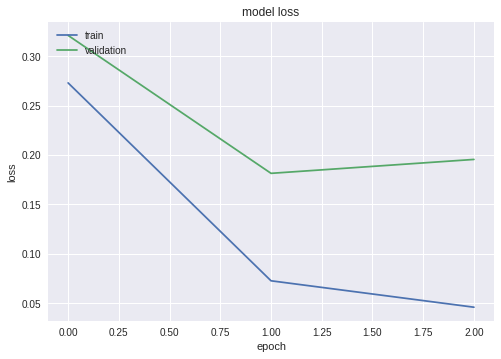

In [27]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dropout(0.65)(x)
x = Dense(100,activation="relu")(x)
x = Dense(7,activation='softmax')(x)

# creating the final model 
model_final = Model(input = model.input, output = x)

model_final.summary()

model_final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

X = model_final.fit(data,labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_split=0.3)

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()